In [1]:
# import tools
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# import data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


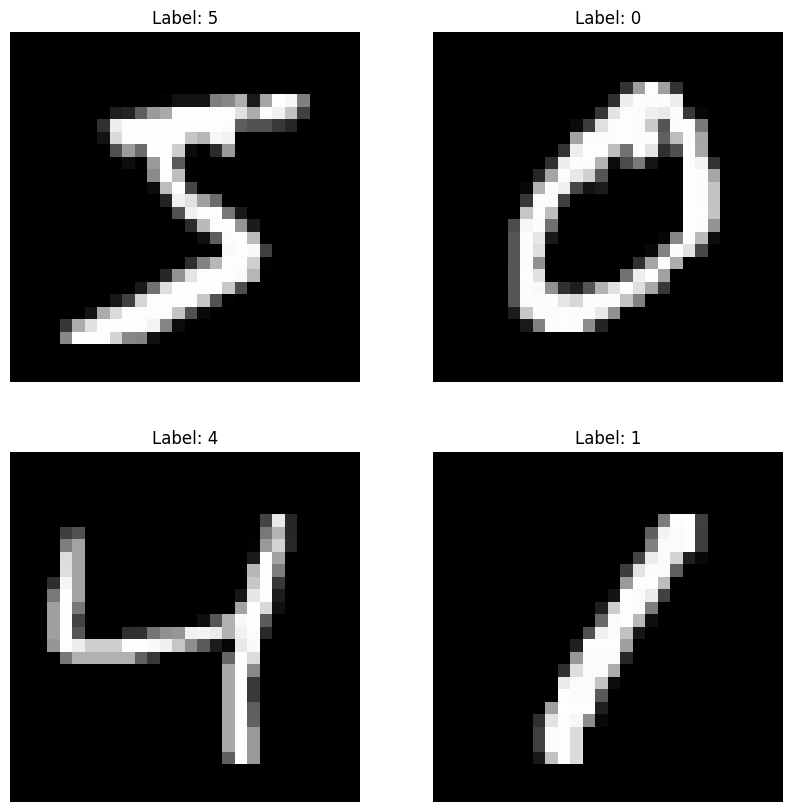

In [4]:
# Plot a sample of images
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

# Explanation
# plt.figure(figsize=(10, 10)): This line creates a new figure with a size of 10x10 inches.
# for i in range(4):: This loop iterates over the first 4 images in the MNIST training dataset.
# plt.subplot(2, 2, i+1): This line specifies that we are creating a 2x2 grid of subplots, and we're currently working on the (i+1)th subplot.
# plt.imshow(x_train[i], cmap='gray'): This line displays the ith image from the MNIST dataset using the imshow function of matplotlib. We specify the colormap as 'gray' to display the image in grayscale.
# plt.title(f'Label: {y_train[i]}'): This line adds a title to the subplot, indicating the label of the corresponding image.
# plt.axis('off'): This line removes the axes (ticks and labels) from the subplot, making the image cleaner.
# plt.show(): This line displays the figure containing the subplots, effectively showing the sample of images.

In [5]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [12]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 21s - loss: 0.2986 - accuracy: 0.9093 - val_loss: 0.1413 - val_accuracy: 0.9581 - 21s/epoch - 69ms/step
Epoch 2/10
300/300 - 18s - loss: 0.1398 - accuracy: 0.9577 - val_loss: 0.1071 - val_accuracy: 0.9667 - 18s/epoch - 59ms/step
Epoch 3/10
300/300 - 18s - loss: 0.1014 - accuracy: 0.9677 - val_loss: 0.0808 - val_accuracy: 0.9747 - 18s/epoch - 59ms/step
Epoch 4/10
300/300 - 18s - loss: 0.0826 - accuracy: 0.9738 - val_loss: 0.0788 - val_accuracy: 0.9764 - 18s/epoch - 61ms/step
Epoch 5/10
300/300 - 18s - loss: 0.0696 - accuracy: 0.9772 - val_loss: 0.0830 - val_accuracy: 0.9735 - 18s/epoch - 59ms/step
Epoch 6/10
300/300 - 19s - loss: 0.0621 - accuracy: 0.9792 - val_loss: 0.0771 - val_accuracy: 0.9751 - 19s/epoch - 63ms/step
Epoch 7/10
300/300 - 19s - loss: 0.0517 - accuracy: 0.9831 - val_loss: 0.0736 - val_accuracy: 0.9758 - 19s/epoch - 63ms/step
Epoch 8/10
300/300 - 20s - loss: 0.0473 - accuracy: 0.9846 - val_loss: 0.0761 - val_accuracy: 0.9775 - 20s/epoch - 66ms/step


Hidden Layers 3
Sigmoid, Accuracy = 97.71
ReLU, Accuracy = 98.35
tanh, Accuracy = 98.05